In [10]:
import networkx as nx

from collections import deque
from itertools import product
import time


# 1 Background
During the last lockdown, tough social distancing regulations were put in place. This was particularly difficult for
students at the Tongersestraat 53. With a combination of one-way staircases and hallways, the building became even
harder to navigate than it already was. We hope it won’t be needed, but just in case and to be prepared, you’re asked
to create a program to help confused students safely find their way around the building!
# 2 Problem Statement
Given is an undirected graph G = (V, E) together with a minimum distance D, maximum time T and two players a, b
that have starting points sa, sb and target points ta, tb respectively.
We wish to find two Socially Distant Paths for the two players to walk. The players walk at equal speeds in the
unweighted graph (one edge per unit of time) and both start walking at t = 0. The path are considered Socially
Distant Paths if at no point in time the players come within distance D (or less) of each other. I.e., if the paths are
given as sequences of vertices pa,1, pa,2, . . . , pa,k and pb,1, pb,2, . . . , pb,k the paths are Socially Distant Paths if and only
if the graph distance between pa,i and pb,i is more than D for all i. E.g., D = 1 indicates the players may never be on
adjacent vertices, D = 2 means they cannot be on two vertices that share a common neighbour, etc...
The path for player a must start at sa and end at ta (so pa,1 = sa and pa,k = ta) and similarly, the path for player b
must start at sb and end at tb (so pb,1 = sb and pb,k = tb).
The possible actions for each player at any time step is to move one edge, or remain in place at the current vertex.
The players move simultaneously, so if one player a moves from a1 to a2 and player b moves from b1 to b2, it is only
required that the distance between a1 and b1 and that between a2 and b2 is large enough; a1 and b2 (and a2 and b1)
can possibly be closer to each other.
The goal is to minimize the time at which both players have arrived at their respective target vertices, that is, to
minimize k. Because the players are in a hurry, k must be at most T . If there is no solution with k ≤ T , report that
this is the case.

In [11]:
# read in file case0.in
# the format is as follows:
# First line: number of nodes, number of edges, T, D
# second line: s1, t1, s2, t2
# following lines contain pairs of integers, representing undirected edges between vertex i and vertex j


In [12]:
class Instance:

    def __init__(self, n, m, T, D, name: str):
        self.n = n
        self.m = m
        self.T = T
        self.D = D
        self.name = name
        self.s1 = 0
        self.t1 = 0
        self.s2 = 0
        self.t2 = 0
        self.G = nx.Graph()


    def read(self, filename: str):
        with open("testcases/"+ filename, "r") as f:
            # get n,m,D,T from first line and cast to int
            self.n, self.m, self.T, self.D = map(int, f.readline().split())
            self.s1, self.t1, self.s2, self.t2 = map(int, f.readline().split())

            # for the follwing lines set edges
            for line in f:
                u, v = map(int, line.split())
                self.G.add_edge(u, v)
                self.G.add_edge(v, u)



    def is_distant(self, a, b, D):
        # returns true if a and b have more than D distance between them
        return nx.shortest_path_length(self.G, a, b) > D


    def find_socially_distant_paths(self):
        queue = deque([((self.s1, self.s2), 0, [])])  # ((position_a, position_b), time, paths)
        visited = set(((self.s1, self.s2), 0))

        while queue:
            (current_a, current_b), time, paths = queue.popleft()
            if time > self.T:
                break
            if current_a == self.t1 and current_b == self.t2:
                return time, paths  # Found a solution

            # Generate all possible next steps for both players
            next_steps_a = list(self.G.neighbors(current_a)) + [current_a]
            next_steps_b = list(self.G.neighbors(current_b)) + [current_b]

            for next_a, next_b in product(next_steps_a, next_steps_b):
                if self.is_distant(next_a, next_b, self.D):
                    if ((next_a, next_b), time + 1) not in visited:
                        visited.add(((next_a, next_b), time + 1))
                        queue.append(((next_a, next_b), time + 1, paths + [(next_a, next_b)]))

        return -1, []  # No solution found




In [13]:
file = "case0.in"
i = Instance(0, 0, 0, 0, file)
i.read(file)

In [14]:
time_to_reach, paths = i.find_socially_distant_paths()

if time_to_reach == -1:
    print("No solution with k ≤ T.")
else:
    print(f"Time to reach the targets for both players is: {time_to_reach}")
    print(f"Paths taken by both players: {paths}")


Time to reach the targets for both players is: 3
Paths taken by both players: [(6, 7), (3, 2), (4, 7)]


In [15]:
# method that times and creates appropriate output for a given file
def run_paths(file: str):
    i = Instance(0, 0, 0, 0, file)
    i.read(file)
    # time the function
    start = time.time()
    time_to_reach, paths = i.find_socially_distant_paths()
    end = time.time()
    soltime = end - start

    if time_to_reach == -1:
        print(i.T + 1)
        print(soltime)
    else:
        print(time_to_reach) # time for both players to reach their targets
        path1, path2 = zip(*paths)
        # append initial positions to the first position of the arrays
        path1 = [i.s1] + list(path1)
        path2 = [i.s2] + list(path2)
        print(" ".join(map(str, path1)))
        print(" ".join(map(str, path2)))
        print(soltime)


Pretty sure time complexity for this is $O(T * V^{3} * (V+E))$ so $O(V^4)$ basically, sounds horrible bruh

In [16]:
run_paths("grid10-0.in")

9
1 12 23 34 45 56 67 78 89 100
10 19 28 37 46 55 64 73 82 91
41.27196025848389


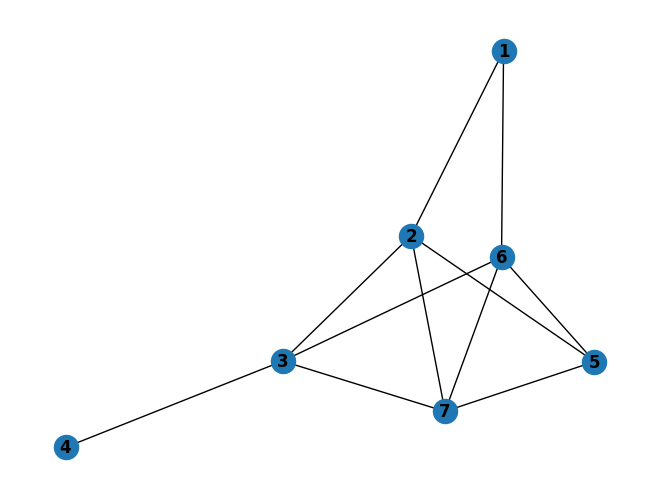

In [17]:
nx.draw(i.G, with_labels=True, font_weight="bold")